In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing

In [3]:
Kansas_data = pd.read_csv('Kansas.csv')

In [4]:
Phila_data = pd.read_csv('Philadelphia.csv')

In [5]:
ks_data = Kansas_data
ks_data = ks_data.fillna(0)
ks_model_data = ks_data[['Tm_Score', 'O_1stD', 'O_TotYd', 'O_PassY', 'O_RushY', 'O_TO', 'D_1stD', 'D_TotYd',
                         'D_PassY', 'D_RushY', 'D_TO']]

In [6]:
season_stats = ['O_1stD', 'O_TotYd', 'O_PassY', 'O_RushY', 'O_TO','D_1stD', 'D_TotYd','D_PassY', 'D_RushY', 'D_TO']

In [7]:
ks_model_data[season_stats] = ks_model_data[season_stats] * 17

<ipython-input-7-44073cdc608b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_model_data[season_stats] = ks_model_data[season_stats] * 17


In [10]:
ks_model_data[season_stats] = preprocessing.normalize(ks_model_data[season_stats])

<ipython-input-10-5a65da8bc9f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_model_data[season_stats] = preprocessing.normalize(ks_model_data[season_stats])


In [11]:
X = ks_model_data.drop('Tm_Score', axis=1)
y = ks_model_data['Tm_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
phi_data = Phila_data
phi_data = phi_data.fillna(0)
phi_model_data = phi_data[['Tm_Score', 'O_1stD', 'O_TotYd', 'O_PassY', 'O_RushY', 'O_TO','D_1stD', 'D_TotYd',
                           'D_PassY', 'D_RushY', 'D_TO']]

In [13]:
phi_model_data[season_stats] = phi_model_data[season_stats] * 17

<ipython-input-13-062149845cbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_model_data[season_stats] = phi_model_data[season_stats] * 17


In [14]:
phi_model_data[season_stats] = preprocessing.normalize(phi_model_data[season_stats])

<ipython-input-14-9ab0af9645e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_model_data[season_stats] = preprocessing.normalize(phi_model_data[season_stats])


In [15]:
X1 = phi_model_data.drop('Tm_Score', axis=1)
y1 = phi_model_data['Tm_Score']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

In [16]:
gb = GradientBoostingRegressor(n_estimators = 2000, random_state = 0)

In [17]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2000, random_state=0)

In [18]:
gb_pred = gb.predict(X_test)

In [19]:
mean_squared_error(y_test, gb_pred)

76.14383557894473

In [20]:
mean_absolute_error(y_test, gb_pred)

7.290890962535783

In [21]:
gb.score(X_test, y_test)

-0.7562305253244233

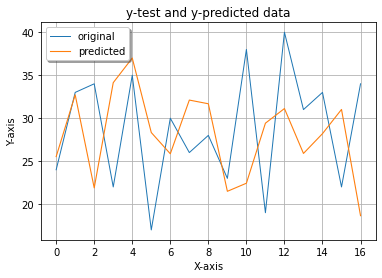

In [22]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, gb_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [25]:
kansas_test1 = pd.DataFrame(ks_model_data[0:17].mean(axis = 0))
kansas_test2 = pd.DataFrame(ks_model_data[0:17].median(axis = 0))
frame = [kansas_test1,kansas_test2]
kansas_test = pd.concat(frame, axis = 1)
kansas_test = kansas_test.mean(axis=1)
kansas_gb = kansas_test.drop('Tm_Score')
kansas_gb = kansas_gb.to_frame()
kansas_gb = kansas_gb.transpose()

In [26]:
gb.predict(kansas_gb)

array([25.75348466])

In [27]:
gb1 = GradientBoostingRegressor(n_estimators = 2000, random_state = 0)
gb1.fit(X1_train, y1_train)

GradientBoostingRegressor(n_estimators=2000, random_state=0)

In [28]:
gb1_pred = gb1.predict(X1_test)

In [29]:
mean_squared_error(y1_test, gb1_pred)

54.00128359045058

In [30]:
mean_absolute_error(y1_test, gb1_pred)

5.760685619295233

In [31]:
gb1.score(X1_test, y1_test)

0.2571931957334498

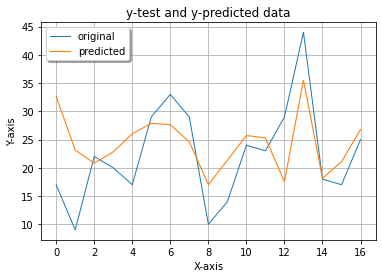

In [32]:
x_ax = range(len(y1_test))
plt.plot(x_ax, y1_test, linewidth=1, label="original")
plt.plot(x_ax, gb1_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [33]:
phi_test1 = pd.DataFrame(phi_model_data[0:17].mean(axis = 0))
phi_test2 = pd.DataFrame(phi_model_data[0:17].median(axis = 0))
frame1 = [phi_test1,phi_test2]
phi_test = pd.concat(frame1, axis = 1)
phi_test = phi_test.mean(axis=1)
phi_gb = phi_test.drop('Tm_Score')
phi_gb = phi_gb.to_frame()
phi_gb = phi_gb.transpose()

In [34]:
gb1.predict(phi_gb)

array([26.68399466])